<a id='top'></a>

# CSCI 3202: Intro to AI - Fall 2020 Practicum 2

## Your name: Connor Ely

#### Collaborator's name (optional): John Salame


---
**Shortcuts:**  [Problem 1: Search](#p1) | [Problem 2: MDP](#p2) | [Problem 3: Q_Learn](#bot)

---

This practicum is due on Canvas by **10:00 PM on Saturday December 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distributions or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your final exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.  If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
6. You may re-use your code or code given from in-class solutions (for e.g. Astar, MDP), but you **must cite** in comments any regions of code that were not created anew for this practicum.
7. You may collaborate with **exactly one** of your classmates.  You must each submit your own assignments and write your own code, and may only collaborate on ideas, psuedocode, etc.  If you choose to collaborate with another student in the class, list their name under yours above.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.
***


In [2]:
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

# added packages
import heapq
from matplotlib import colors


Consider the map of the area to the west of the Engineering Center given below, with a fairly coarse Cartesian grid superimposed.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/engineering_center_grid_zoom.png" style="width: 800px;"/>

The green square at $(x,y)=(1,15)$ is the starting location, and you would like to walk from there to the yellow square at $(25,9)$. The filled-in blue squares are obstacles, and you cannot walk through those locations.  You also cannot walk outside of this grid.

Legal moves in the North/South/East/West directions have a step cost of 1. Moves in the diagonal direction (for example, from $(1,15)$ to $(2,14)$) are allowed, but they have a step cost of $\sqrt{2}$. 


In [3]:
#Some tuples defining the wall and state locations, for your convenience

walls = [(1,y) for y in range(2,15)] + [(2,y) for y in range(3,14)] + [(3,y) for y in range(4,13)] + \
        [(4,y) for y in range(5,12)] + [(x,1) for x in range(5,24)] + [(10,y) for y in range(9,13)] + \
        [(x,y) for x in range(11,14) for y in range(9,15)] + [(14,y) for y in range(11,15)] + \
        [(x,y) for x in range(21,26) for y in range(11,17)] + \
        [(x,y) for x in [0,26] for y in range(0,18)] + [(x,y) for x in range(0,26) for y in [0,17]]
        
states = [(x,y) for x in range(1,26) for y in range(1,17)]

[Back to top](#top)
<a id='p1'></a>


---
## [40 pts] Part 1:  Route-finding
In this problem, our goal is to find the path from the green to yellow squares with the **shortest total path length**.

Of course, you can probably do this problem (and likely have to some degree, in your head) without a search algorithm. But that will hopefully provide a useful "sanity check" for your answer.

#### Part A
Write a function `adjacent_states(state)`:
* takes a single argument `state`, which is a tuple representing a valid state in this state space
* returns in some form the states reachable from `state` and the step costs. How exactly you do this is up to you.

Print to the screen the output for `adjacent_states((1,15))`.

In [4]:
def adjacent_states(state):
    possible_moves = []
    if state not in states or state in walls:
        print("Invalid starting state")
        return None
    else:
        if (state[0], state[1]+1) in states and (state[0], state[1]+1) not in walls:
            possible_moves.append(((state[0], state[1]+1), 1))
        if (state[0]+1, state[1]) in states and (state[0]+1, state[1]) not in walls:
            possible_moves.append(((state[0]+1, state[1]), 1))
        if (state[0], state[1]-1) in states and (state[0], state[1]-1) not in walls:
            possible_moves.append(((state[0], state[1]-1), 1))
        if (state[0]-1, state[1]) in states and (state[0]-1, state[1]) not in walls:
            possible_moves.append(((state[0]-1, state[1]), 1))
        if (state[0]+1, state[1]+1) in states and (state[0]+1, state[1]+1) not in walls:
            possible_moves.append(((state[0]+1, state[1]+1), np.sqrt(2)))
        if (state[0]-1, state[1]-1) in states and (state[0]-1, state[1]-1) not in walls:
            possible_moves.append(((state[0]-1, state[1]-1), np.sqrt(2)))
        if (state[0]+1, state[1]-1) in states and (state[0]+1, state[1]-1) not in walls:
            possible_moves.append(((state[0]+1, state[1]-1), np.sqrt(2)))
        if (state[0]-1, state[1]+1) in states and (state[0]-1, state[1]+1) not in walls:
            possible_moves.append(((state[0]-1, state[1]+1), np.sqrt(2)))
        return possible_moves
    #Note: The above code is modified from the code I used in HW4
print(adjacent_states((1,15)))

[((1, 16), 1), ((2, 15), 1), ((2, 16), 1.4142135623730951), ((2, 14), 1.4142135623730951)]


#### Part B
Three candidate heuristic functions might be:
1. `heuristic_cols(state, goal)` = number of columns between the argument `state` and the `goal`
1. `heuristic_rows(state, goal)` = number of rows between the argument `state` and the `goal`
1. `heuristic_eucl(state, goal)` = Euclidean distance between the argument `state` and the `goal`

Write a function `heuristic_max(state, goal)` that returns the maximum of all three of these heuristic functions for a given `state` and `goal`.

In [5]:
def heuristic_cols(state, goal):
    if goal[0] >= state[0]:
        if goal[0] == state[0]:
            return 0
        return (goal[0]-state[0])
    elif goal[0] < state[0]:
        return (state[0]-goal[0])
def heuristic_rows(state, goal):
    if goal[1] >= state[1]:
        if goal[1] == state[1]:
            return 0
        return (goal[1]-state[1])
    elif goal[1] < state[1]:
        return (state[1]-goal[1])
def heuristic_eucl(state, goal):    #Modified from my Practicum 1 code
    return np.sqrt(((state[0] - goal[0])**2) + ((state[1] - goal[1])**2))
def heuristic_max(state, goal):
    heuristic_list = (heuristic_cols(state,goal), heuristic_rows(state,goal), heuristic_eucl(state,goal))
    return max(heuristic_list)

#### Part C
Is the Manhattan distance an admissible heuristic function for this problem?  Explain why or why not.

A heuristic is admissible if it never overestimates the actual cost to the goal. Manhattan distance will find a path that could possibly go through a building and will find the shortest straight line path. Therefore, it would be an admissible heursitic since it would never overestimate the cost and would, in many cases like the case of the start and goal states provided above, underestimate the cost to the goal.

#### Part D
Use A\* search and the `heuristic_max` heuristic to find the shortest path from the initial state at $(1,15)$ to the goal state at $(25,9)$. Your search **should not** build up the entire state space graph in memory. Instead, use the `adjacent_states` function from Part A, similarly to the 8-tile problem from Homework 3. 

In [6]:
class Frontier_PQ: #Priority Queue class, reused from my HW2
    def __init__(self, start, cost):
        self.start = start
        self.cost = cost
        self.states = {start: cost}
        self.q = [(cost, start)]
        
    def add(self, state, cost):
        heapq.heappush(self.q, (cost, state))
        self.states[state] = cost
        
    def pop(self):
        to_be_returned = heapq.heappop(self.q)
        return to_be_returned
    
    def replace(self, state, cost):
        for i in range(len(self.q)):
            if self.q[i][1] == state:
                self.q[i] = (cost, state)
        heapq.heapify(self.q)
        self.states[state] = cost

def path(previous, s): #Provided function from HW2
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def astar_search(start, goal, heuristic): #Modified from my code from HW2
    priority_queue = Frontier_PQ(start, heuristic(start, goal))
    path_dict = {(x,y): None for x in range(1,26) for y in range(1,17)}
    visited = []
    visited.append(start)
    while len(priority_queue.q) > 0:
        temp = priority_queue.pop()
        if temp[1] == goal:
            return (path(path_dict, temp[1]))
        else:
            for i in adjacent_states(temp[1]):
                if i[0] not in visited:
                    priority_queue.add(i[0], priority_queue.states[temp[1]] + heuristic(i[0], goal))
                    visited.append(i[0])
                    path_dict[i[0]] = temp[1]
                elif priority_queue.states[i[0]] > priority_queue.states[temp[1]] + heuristic(i[0], goal):
                    priority_queue.replace(i[0], priority_queue.states[temp[1]] + heuristic(i[0], goal))
                    path_dict[i[0]] = temp[1]
print(astar_search((1,15), (25,9), heuristic_max))
cost = (8*np.sqrt(2)) + 16
print("The cost of this path is:", cost)
#Note: I could have made a function to calculate the path cost similar to path_cost in HW2, but it was giving me a lot of
#trouble and I was short on time so I had to hardcode it.

[(1, 15), (2, 14), (3, 13), (4, 12), (5, 11), (6, 10), (7, 9), (8, 9), (9, 9), (10, 8), (11, 8), (12, 8), (13, 8), (14, 9), (15, 9), (16, 9), (17, 9), (18, 9), (19, 9), (20, 9), (21, 9), (22, 9), (23, 9), (24, 9), (25, 9)]
The cost of this path is: 27.31370849898476


#### Part E
Make a figure depicting the optimal route from the initial state to the goal, similarly to how you depicted the maze solution in Homework 2.

<ipython-input-7-9d93c26f857f>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


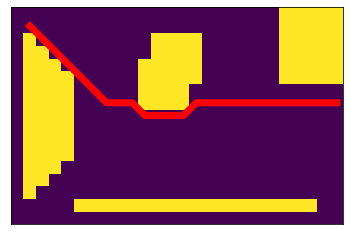

In [7]:
def plot_path(all_states, walls, path=None):
    a = np.zeros((17,26))
    for i in range(1,26):
        for j in range(1,17):
            if (i, j) in walls:
                a[j][i] = 1
    if path != None:
        x_cords = []
        y_cords = []
        for i in range(len(path)):
            x_cords.append(path[i][0] + 0.5)
            y_cords.append(path[i][1] + 0.5)
    plt.pcolormesh(a)
    plt.plot(x_cords,y_cords,color='r',linewidth=7.0)
    plt.axes().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    # I found this method on stackexchange (https://stackoverflow.com/questions/53161342/plotting-a-maze-diagram-using-matplot-in-python)
    # and it looked too nice to not use it. I had never used pcolormesh before in data science, but I had also never plotted a maze before
plot_path(states, walls, astar_search((1,15), (25,9), heuristic_max))
# Note: this code is heavily borrowed from the function I used to plot in HW2. Also there is an extra blue line to the left
# and bottom of the picture since the array is zero indexed but there is no zero index in the picture above

[Back to top](#top)
<a id='p2'></a>


---
## [40 pts] Part 2:  States and Values

Winter has come, and now the area west of Engineering is icy and slippery.  As a result, there's a risk that we don't end up in the tile that we intend to move to!  In particular, if we have $k$ available actions in state $n$, the probably that we move to the state $s'$ we intend to is 75\%, and the remaining 0.25 probability is spread equally likely across all of the other adjacent (N/S/E/W/NW/NE/SE/SW) non-wall states.

In this problem, our goal is to create a policy for an agent walking in the given space west of Engineering.  Again, the goal of the agent is to navigate from start to finish, but now we want a policy for each and every location on the map.

This time, however, we're going to add the same type of randomness that our process in homework 4 had.

Because the state space is fully observable, we should be able to implement this as a Markov Decision process.


#### Part A:

Write the necessary functions to create *either* a **value iteration** or **policy iteration** scheme to solve for the MDP.  If you wish to follow the schema for homework 4, you may want to create an `MDP` class, with methods:

- `actions`, given by the valid successor states $s'$ from all actions $a$ in state $s$ in your adjacent_states from part 1.
- `rewards`, given by a significant positive reward for the goal state (e.g. 10) and a small negative reward for spending a long time in the system (e.g. non-wall reward of -0.01).
- `result`, which returns the successor state $s'$ of an *actual* movement $a$ from state $s$.
- `transition`, which returns the probability of an actual successor $s'$ given action $a$ from state $s$ using the 75\%-25% split above.


In [8]:
class MDP:
    def __init__(self, nrow, ncol, terminal, default_reward, discount, walls, states): #Very similar to HW4, just added walls param.
        '''Create/store the following attributes:
        states -- list of all the states (x,y) tuples
        terminal_states -- is a dictionary with terminal state keys, and rewards as values
        default_reward -- is the reward for being in any non-terminal state
        df -- discount factor
        ... and anything else you decide will be useful!
        '''
        self.nrow = nrow
        self.ncol = ncol
#         self.states = [(x,y) for x in range(1,ncol+1) for y in range(1,nrow+1)]
        self.states = states
        self.walls = walls
        self.terminal_states = terminal
        self.default_reward = default_reward
        self.df = discount        
        

    def actions(self, state): #Modified from HW4 and the adjacent_states function above
        '''Return a list of available actions from the given state.
        [None] are the actions available from a terminal state.
        '''
        
        actions = []
        if state in self.terminal_states:
            return [None]
        else:
            if (state[0], state[1]+1) in self.states and (state[0], state[1]+1) not in self.walls:
                actions.append("N")
            if (state[0]+1, state[1]) in self.states and (state[0]+1, state[1]) not in self.walls:
                actions.append("E")
            if (state[0], state[1]-1) in self.states and (state[0], state[1]-1) not in self.walls:
                actions.append("S")
            if (state[0]-1, state[1]) in self.states and (state[0]-1, state[1]) not in self.walls:
                actions.append("W")
            if (state[0]+1, state[1]+1) in self.states and (state[0]+1, state[1]+1) not in self.walls:
                actions.append("NE")
            if (state[0]-1, state[1]-1) in self.states and (state[0]-1, state[1]-1) not in self.walls:
                actions.append("SW")
            if (state[0]+1, state[1]-1) in self.states and (state[0]+1, state[1]-1) not in self.walls:
                actions.append("SE")
            if (state[0]-1, state[1]+1) in self.states and (state[0]-1, state[1]+1) not in self.walls:
                actions.append("NW")
            return actions
        
        
        
    def reward(self, state): #Taken from HW4
        '''Return the reward for being in the given state'''
        
        return self.terminal_states[state] if state in self.terminal_states.keys() else self.default_reward
        
        
    def result(self, state, action): #Added diagonals to function from HW4
        '''Return the resulting state (as a tuple) from doing the given
        action in the given state, without uncertainty. Uncertainty
        is incorporated into the transition method.
        state -- a tuple representing the current state
        action -- one of N, S, E or W, as a string
        '''
    
#         assert action in self.actions(state), 'Error: action needs to be available in that state'
        assert state in self.states, 'Error: invalid state'
#         assert state not in self.walls, 'Error: invalid state. cannot be in a wall!'
        
        if action == "N":
            return (state[0], state[1]+1)
        elif action == "S":
            return (state[0], state[1]-1)
        elif action == "E":
            return (state[0]+1, state[1])
        elif action == "W":
            return (state[0]-1, state[1])
        elif action == "NE":
            return (state[0]+1, state[1]+1)
        elif action == "SW":
            return (state[0]-1, state[1]-1)
        elif action == "SE":
            return (state[0]+1, state[1]-1)
        elif action == "NW":
            return (state[0]-1, state[1]+1)
        elif action == 'None':
            return state

        
                
    def transition(self, state, action): #Same function as HW4 with modified probabilities
        '''Return the probabilities and subsequent states associated
        with taking the given action from the given state. Can be done
        however you want, so that it works with your value/policy iteration.
        '''
        
        if action is None:
            return [(0, state)]
        else:
            possible_actions = self.actions(state)
            if action not in possible_actions:
                print("Action cannot be taken from current state.")
                return [(0, state)]
            possible_actions.remove(action)
            prob_and_states = [(0.75, self.result(state, action))]
            equal_prob = 0.25/(len(possible_actions)+1)
            for i in possible_actions:
                prob_and_states.append((equal_prob, self.result(state, i)))
            prob_and_states.append((equal_prob, state))
            return prob_and_states
        
    def actions(self, state): #Modified from HW4 and the adjacent_states function above
        '''Return a list of available actions from the given state.
        [None] are the actions available from a terminal state.
        '''
        
        actions = []
        if state in self.terminal_states:
            return [None]
        else:
            if (state[0], state[1]+1) in self.states and (state[0], state[1]+1) not in self.walls:
                actions.append("N")
            if (state[0]+1, state[1]) in self.states and (state[0]+1, state[1]) not in self.walls:
                actions.append("E")
            if (state[0], state[1]-1) in self.states and (state[0], state[1]-1) not in self.walls:
                actions.append("S")
            if (state[0]-1, state[1]) in self.states and (state[0]-1, state[1]) not in self.walls:
                actions.append("W")
            if (state[0]+1, state[1]+1) in self.states and (state[0]+1, state[1]+1) not in self.walls:
                actions.append("NE")
            if (state[0]-1, state[1]-1) in self.states and (state[0]-1, state[1]-1) not in self.walls:
                actions.append("SW")
            if (state[0]+1, state[1]-1) in self.states and (state[0]+1, state[1]-1) not in self.walls:
                actions.append("SE")
            if (state[0]-1, state[1]+1) in self.states and (state[0]-1, state[1]+1) not in self.walls:
                actions.append("NW")
            return actions
        


#### Part B:

Using the MDP in part 2A, implement value iteration **or** policy iteration to calculate the utilities for each state. Also implement a function that takes as arguments an MDP object and a dictionary of state-utility pairs (key-value) and returns a dictionary for the optimal policy. The optimal policy dictionary should have state tuples as keys and the optimal move (None or any of the 8 directions) as values.

In [9]:
def value_iteration(mdp, tol=1e-3): #taken from HW4
    df = 1 - tol
    utility_new = {s : 0 for s in mdp.states}
    while True:
        utility_old = utility_new.copy()
        max_change = 0
        for s in mdp.states:
            next_states = [mdp.transition(s, a) for a in mdp.actions(s)]
            best_utility = -999
            for k in range(len(next_states)):
                newsum = sum([next_states[k][j][0]*utility_old[next_states[k][j][1]] for j in range(len(next_states[k]))])
                best_utility = max(best_utility, newsum)
                if len(next_states)==1:
                    best_utility = newsum
            utility_new[s] = mdp.reward(s) + df*best_utility
            max_change = max(max_change, abs(utility_new[s]-utility_old[s]))
        if (df==1 and max_change < tol) or max_change < tol*(1-df)/df:
            break
    return utility_new

def find_policy(mdp, utility): #taken from HW4
    
    policy = {s : None for s in mdp.states}
    for s in mdp.states:
        best_utility = (-999, None)
        for a in mdp.actions(s):
            newsum = sum([p*utility[s2] for p, s2 in mdp.transition(s,a)])
            if newsum > best_utility[0]:
                best_utility = (newsum, a)
        policy[s] = best_utility[1]
    return policy


#### Part C:

Sanity check your answers in part B by listing which state has the *lowest* estimated utility (should be far from the goal!) and which states have the 3 *highest* estimated utilities.

In [10]:
nrow = 16
ncol = 25
default_reward = -0.01
discount = 0.99
terminal = {(25,9):10}
states_without_walls = [x for x in states if x not in walls]
test_mdp = MDP(nrow, ncol, terminal, default_reward, discount, walls, states_without_walls)
utility_dict = value_iteration(test_mdp)
policy_dict = find_policy(test_mdp, utility_dict)

In [11]:
min_utility = min(utility_dict.values()) 
min_utility_state = [key for key in utility_dict if utility_dict[key] == min_utility] 
print("Lowest estimated utility is at:", min_utility_state)
c = Counter(utility_dict)
mc = c.most_common(3) #https://stackoverflow.com/questions/40496518/how-to-get-the-3-items-with-the-highest-value-from-dictionary
print("States with the highest utility (including the goal):")
for i in mc:
    print(i[0])

Lowest estimated utility is at: [(1, 16)]
States with the highest utility (including the goal):
(25, 9)
(25, 10)
(24, 9)



#### Part D:

As in part 1E, make a figure.  This time, depict the optimal policy at each location.  Your choice of visualization is up to you, but I would *recommend* taking a plot similar to the maze plot in Part 1E above (or HW 2) and plotting some choice of arrows/symbols/colors corresponding to the appropriate action in each square.

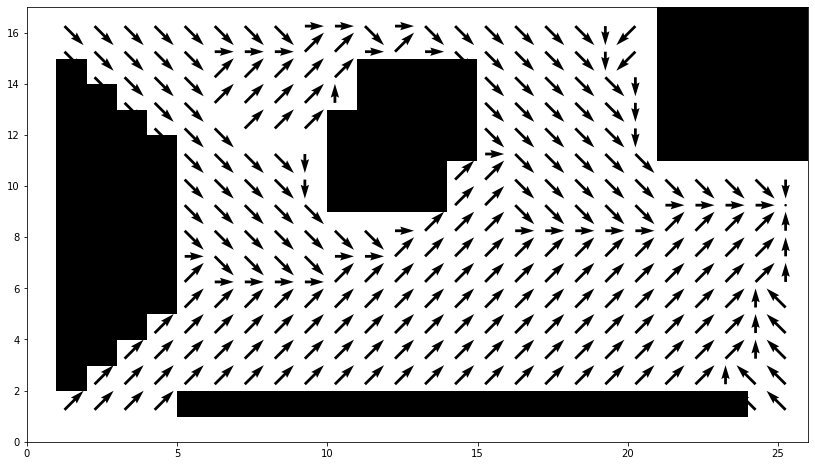

In [58]:
cmap = plt.get_cmap('Greys')
a = np.zeros((17,26))
for i in range(1,26):
    for j in range(1,17):
        if (i, j) in walls:
            a[j][i] = 1
arrow_x_cords = []
arrow_y_cords = []
arrow_x_directions = []
arrow_y_directions = []
for i in range(len(states_without_walls)):
    arrow_x_cords.append(states_without_walls[i][0] + 0.25)
    arrow_y_cords.append(states_without_walls[i][1] + 0.25)
for i in policy_dict.values():
    if i == "N":
        arrow_x_directions.append(0)
        arrow_y_directions.append(1)
    if i == "E":
        arrow_x_directions.append(1)
        arrow_y_directions.append(0)
    if i == "S":
        arrow_x_directions.append(0)
        arrow_y_directions.append(-1)
    if i == "W":
        arrow_x_directions.append(-1)
        arrow_y_directions.append(0)
    if i == "NE":
        arrow_x_directions.append(1)
        arrow_y_directions.append(1)
    if i == "SW":
        arrow_x_directions.append(-1)
        arrow_y_directions.append(-1)
    if i == "SE":
        arrow_x_directions.append(1)
        arrow_y_directions.append(-1)
    if i == "NW":
        arrow_x_directions.append(-1)
        arrow_y_directions.append(1)
    if i == None:
        arrow_x_directions.append(0)
        arrow_y_directions.append(0)
fig, ax = plt.subplots(figsize =(14, 8)) 
ax.quiver(arrow_x_cords, arrow_y_cords, arrow_x_directions, arrow_y_directions, zorder = 1)
ax.pcolormesh(a, cmap=cmap, zorder = 0)
plt.show()

[Back to top](#top)
<a id='p3'></a>


---
## [20 pts] Part 3:  The great unknown

It's nearly winter solstice, and the area west of Engineering is still icy and slippery.  

As a result, there's still a risk that we don't end up in the tile that we intend to move to!  Unfortunately, for this problem we *don't know* what that risk is, and it isn't the same everywhere.  As in Problem 2, our goal is to create a policy for an agent walking in the given space west of Engineering.  Again, the goal of the agent is to navigate from start to finish, but now we want a policy for each and every location on the map

Suppose there exists some function $f$ that measures the *footing* of state $s$.  Then if we choose to take the action "move towards state $s'$" from state $n$, the probability that we *actually arrive* in the state $s'$ we intend to is $f(s)$.  As before, the remaining $1-f(s)$ probability is spread equally likely across all of the other adjacent (N/S/E/W/NW/NE/SE/SW) non-wall states to $s$.

Because our agent can't fully observe the transitions, it's going to have to pick actions and estimate their utilities from learning.  Let's use Q-learning!

#### Part A:

Run the following code to provide a function for and a map of the footing function $f$.


Text(0.5, 1.0, 'Footing')

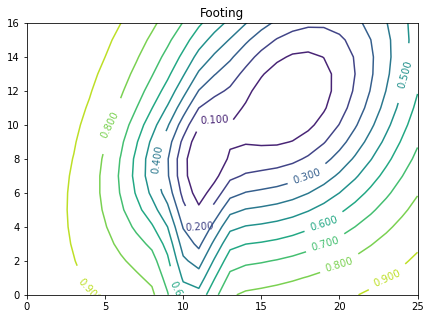

In [13]:
###YOU MAY IGNORE THIS CELL, BUT MUST RUN IT TO GENERATE F
random.seed(30)
x = np.linspace(0,25,26)
y = np.linspace(0,25,26)
X,Y = np.meshgrid(x,y)
f1 = np.zeros(X.shape)
f2 = np.zeros(X.shape)
f3 = np.zeros(X.shape)
f4 = np.zeros(X.shape)

mu1, mu2, mu3, mu4=[17,12],[17,11],[11,8],[11,6]
covar1, covar2, covar3, covar4= [[16,8],[8,16]],[[12,.5],[.5,12]],[[4,.8],[.8,4]],[[.8,12],[.8,12]]
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        f1[i,j] = 6*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu1, cov=covar1)
        f2[i,j] = 3*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu2, cov=covar2)
        f3[i,j] = stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu3, cov=covar3)
        f4[i,j] = 1*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu4, cov=covar4)
        
f =f1+f2+f3+f4    
f=1-(f/np.max(f))**(1/3)

#PLOTTING:
fig, ax = plt.subplots(1,1, figsize=(7,5))
my_levels = np.linspace(0, 1, 11)
labels = [str(lv) for lv in my_levels]
cp = ax.contour(X, Y, f, levels=my_levels)
plt.clabel(cp, inline=1, fontsize=10)
ax.set(xlim=(0, 25), ylim=(0, 16))
plt.title('Footing')


In [14]:

# You can access f directly using indices if you use the TRANPOSE of the coordinates of each point
#which this footing function does
def footing(x,y):
    return f[y,x]

print("It's icy at (12,8), with almost no footing:", footing(12,8))
print("It's better at (8,12):", footing(8,12))

It's icy at (12,8), with almost no footing: 0.0344326686812465
It's better at (8,12): 0.6595232752211774


#### Part B:

We're going to implement Q-learning instead of an MDP.

You will probably want to create a dictionary of the form discussed at the end of the in-class notebook for Q-learning, where each valid tuple is the first key and each valid move from that location is the second key.  You then should have the estimated utilities of each action saved in the resulting dictionary.  You may include other information if desired, but nothing else should be absolutely necessary.

After initialization, print the elements of the dictionary corresponding to the (4,4) location.  Note that there should be 7 subdictionaries for the 6 possible neighbors and the `None` action, and within each action the initial Q-value should be zero.

In [15]:
class MDP_Q_learning(MDP): #inheriting from first MDP class, purpose is just to implement the footing
    def __init__(self, nrow, ncol, terminal, default_reward, discount, walls, states): #Very similar to HW4, just added walls param.
        '''Create/store the following attributes:
        states -- list of all the states (x,y) tuples
        terminal_states -- is a dictionary with terminal state keys, and rewards as values
        default_reward -- is the reward for being in any non-terminal state
        df -- discount factor
        ... and anything else you decide will be useful!
        '''
        self.nrow = nrow
        self.ncol = ncol
#         self.states = [(x,y) for x in range(1,ncol+1) for y in range(1,nrow+1)]
        self.states = states
        self.walls = walls
        self.terminal_states = terminal
        self.default_reward = default_reward
        self.df = discount
        
    def transition(self, state, action): #inherited from above to implement footing
        '''Return the probabilities and subsequent states associated
        with taking the given action from the given state. Can be done
        however you want, so that it works with your value/policy iteration.
        '''

        if action is None:
            return [(0, state)]
        else:
            possible_actions = self.actions(state)
            if action != 'None':
                if action not in possible_actions:
                    print("Action cannot be taken from current state.")
                    return [(0, state)]
                possible_actions.remove(action)
                footing_at_state = footing(state[0], state[1]) #changed from above
                prob_and_states = [(footing_at_state, self.result(state, action))] #prob of move we want is footing value
                equal_prob = (1-footing_at_state)/(len(possible_actions)+1) #probability of other actions
                for i in possible_actions:
                    prob_and_states.append((equal_prob, self.result(state, i)))
                prob_and_states.append((equal_prob, state))
                return prob_and_states
            footing_at_state = footing(state[0], state[1]) #changed from above
            prob_and_states = [(footing_at_state, self.result(state, action))] #prob of move we want is footing value
            equal_prob = (1-footing_at_state)/(len(possible_actions)) #probability of other actions
            for i in possible_actions:
                prob_and_states.append((equal_prob, self.result(state, i)))
            return prob_and_states

In [30]:
#create a Q, initialize all the Q-utilities as 0.
nrow = 16
ncol = 25
default_reward = -0.01
discount = 0.99
terminal = {(25,9):10}
Q_dict = {}
second_mdp = MDP_Q_learning(nrow, ncol, terminal, default_reward, discount, walls, states_without_walls)
for i in states_without_walls:
    Q_dict[i] = {}
    for j in second_mdp.actions(i):
        Q_dict[i][j] = 0
    Q_dict[i]['None'] = 0
print(Q_dict[(12,4)])
rewards = {}
for i in states_without_walls:
    rewards[i] = default_reward
rewards[(25,9)] = 10
alpha = 0.3

{'N': 0, 'E': 0, 'S': 0, 'W': 0, 'NE': 0, 'SW': 0, 'SE': 0, 'NW': 0, 'None': 0}


#### Part C:

Use the given `footing` function to modify your `transitions` from the MDP so the probabilities of result given action now flow from the icy model above.

Perform at least 1000 training epochs, where each starts at a *random* location from the valid states (this can help if find the goal state faster!).

For each epoch, take *at most* 100 actions, or until the goal is reached.  You may choose these actions by any schema you desire, but I recommend the $\varepsilon$-greedy agent that chooses the "best available" action 80% of the time and explores the other 20%. 

Show graphs depicting the actual paths taken for the last 2 of the training epochs.

<ipython-input-7-9d93c26f857f>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


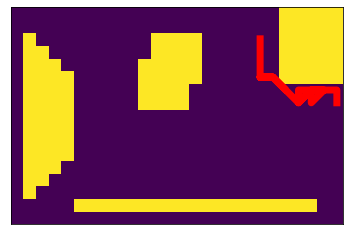

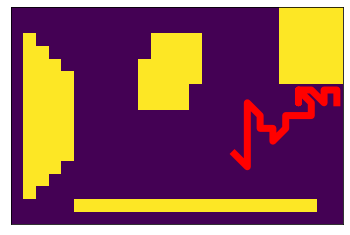

In [33]:
last_two_paths = []
for ii in range(1000): #Number of epochs
    current_state = random.choice(states_without_walls)
    Q_path = []
    if ii >= 998: #We want the last two paths to plot
        Q_path.append(current_state)
    for jj in range(100): #Number of actions
        if(current_state == (25, 9)):
            if(ii >= 998):
                last_two_paths.append(Q_path)
            break
        
        #Get list of possible actions for the state
        actions_possible = second_mdp.actions(current_state)
        actions_possible.append('None')
        
        #Epsilon greedy of if we should take the best action or not
        take_best = np.random.choice([True, False], p=[0.8, 0.2])
        if take_best: #take best available action
            
            #Find best action at the current state by Q-values
            best_action_at_state_value = max(Q_dict[current_state].values())
            for i in Q_dict[current_state]:
                if Q_dict[current_state][i] == best_action_at_state_value:
                    best_action_at_state = i
                    break
            
            #Transition model (with ice) for the state and action chosen
            current_transition = second_mdp.transition(current_state, best_action_at_state)
            probs = []
            for i in current_transition:
                probs.append(i[0])
            action_taken = np.random.choice(actions_possible, p=probs)
            result_state = second_mdp.result(current_state, action_taken)
            if ii >= 998:
                Q_path.append(result_state)
                
            #Using bellman equation to update Q-value
            best_Q_result_state = max(Q_dict[result_state].values()) 
            QD = rewards[result_state] + (discount * best_Q_result_state) - best_action_at_state_value
            Q_dict[current_state][best_action_at_state] += alpha * QD
            current_state = result_state
        else:
            #Choose a random action
            random_action = random.choice(actions_possible)
            random_action_value = Q_dict[current_state][random_action]
            
            #Transition model (with ice) for the state and action chosen
            current_transition = second_mdp.transition(current_state, random_action)
            probs = []
            for i in current_transition:
                probs.append(i[0])
            action_taken = np.random.choice(actions_possible, p=probs)
            result_state = second_mdp.result(current_state, action_taken)
            if ii >= 998:
                Q_path.append(result_state)
            
            #Using bellman equation to update Q-value
            best_Q_result_state = max(Q_dict[result_state].values()) 
            QD = rewards[result_state] + (discount * best_Q_result_state) - random_action_value
            Q_dict[current_state][random_action] += alpha * QD
            current_state = result_state
        if(ii>= 998 and jj == 99):
            last_two_paths.append(Q_path)
plot_path(states_without_walls, walls, last_two_paths[0])
plot_path(states_without_walls, walls, last_two_paths[1])

#### Part D:

As in part 2D, make a figure depicting the optimal policy at each location.  Does your agent actually try to avoid the ice, compared to how it behaved in the MDP in Part 2?

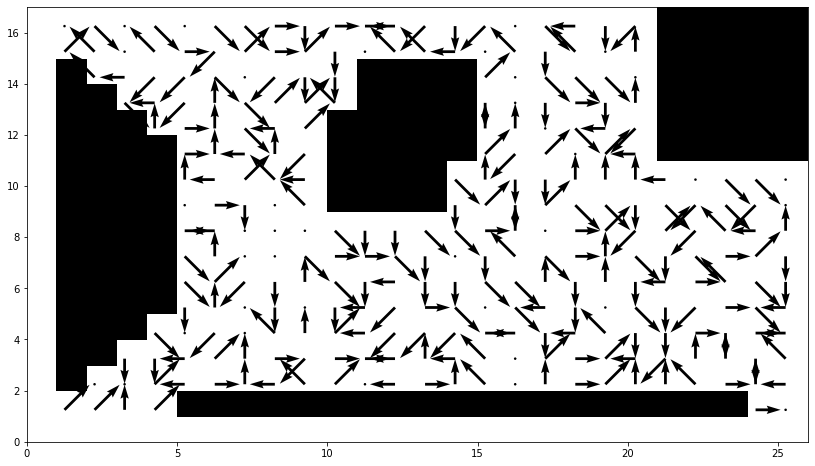

In [73]:
Q_dict_final_values = {} #Dictionary that will hold action with best Q-value at each state
for i in Q_dict:
    #Finding max Q-value for any given state
    temporary = max(Q_dict[i].values())
    
    #Finding the action associated with said max Q-value
    for j in Q_dict[i]:
        if Q_dict[i][j] == temporary:
            Q_dict_final_values[i] = j #Putting that into the freshly made dictionary
            break

cmap = plt.get_cmap('Greys')
arrow_x_cords = []
arrow_y_cords = []
arrow_x_directions_2 = []
arrow_y_directions_2 = []
for i in range(len(states_without_walls)):
    arrow_x_cords.append(states_without_walls[i][0] + 0.25)
    arrow_y_cords.append(states_without_walls[i][1] + 0.25)
for i in Q_dict_final_values.values():
    if i == "N":
        arrow_x_directions_2.append(0)
        arrow_y_directions_2.append(1)
    if i == "E":
        arrow_x_directions_2.append(1)
        arrow_y_directions_2.append(0)
    if i == "S":
        arrow_x_directions_2.append(0)
        arrow_y_directions_2.append(-1)
    if i == "W":
        arrow_x_directions_2.append(-1)
        arrow_y_directions_2.append(0)
    if i == "NE":
        arrow_x_directions_2.append(1)
        arrow_y_directions_2.append(1)
    if i == "SW":
        arrow_x_directions_2.append(-1)
        arrow_y_directions_2.append(-1)
    if i == "SE":
        arrow_x_directions_2.append(1)
        arrow_y_directions_2.append(-1)
    if i == "NW":
        arrow_x_directions_2.append(-1)
        arrow_y_directions_2.append(1)
    if i == 'None':
        arrow_x_directions_2.append(0)
        arrow_y_directions_2.append(0)
    if i == None:
        arrow_x_directions_2.append(0)
        arrow_y_directions_2.append(0)
fig, ax = plt.subplots(figsize =(14, 8))
ax.quiver(arrow_x_cords, arrow_y_cords, arrow_x_directions_2, arrow_y_directions_2, zorder = 1)
ax.pcolormesh(a, cmap=cmap, zorder = 0)
plt.show()

Well, my agent definitely *got* messed up by the ice. The fact that at some places the ice can take the agent in one direction yet he still will update the Q-value for where he thinks he's going can really throw off hiss calculations. It looks like he does try and move away from ice in some places, but the degree of randomness in the plot makes me doubt my algorithm. Having said that though, the agent did still make it to the goal around 50% of the time when I did my trials, so the reward of the goal still made it sort itself out at least some of the time.